In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
%ls

diabetes_012_health_indicators_updated.csv  sample_data/


In [ ]:
# Read the CSV file 'diabetes_012_health_indicators_updated.csv' into a DataFrame
df = pd.read_csv('diabetes_012_health_indicators_updated.csv')

# Create a new DataFrame using the read data
df = pd.DataFrame(df)

In [ ]:
# Display a random sample (single row) from the DataFrame 'df'
df.sample()

,Unnamed: 0,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
1684,1684,0.0,1.0,No,1.0,23.0,Yes,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,No,female,69.0,5.0,6.0


**Data Preprocessing**

In [ ]:
# Create a new column 'Diabetes_01' in the DataFrame 'df' and assign the values from the 'Diabetes_012' column
df['Diabetes_01'] = df.loc[:, 'Diabetes_012']

In [ ]:
df.sample()

,Unnamed: 0,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_01
5273,5273,0.0,1.0,Yes,1.0,27.0,Yes,0.0,0.0,1.0,...,0.0,1.0,2.0,5.0,No,male,66.0,6.0,3.0,0.0


In [ ]:
# Replace values in the 'Diabetes_01' column of the DataFrame 'df'
df['Diabetes_01'].replace([1, 2], [1, 1], inplace=True)

In [ ]:
# Display information about the DataFrame 'df', including data types and memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10978 entries, 0 to 10977
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            10978 non-null  int64  
 1   Diabetes_012          10978 non-null  float64
 2   HighBP                10978 non-null  float64
 3   HighChol              10978 non-null  object 
 4   CholCheck             10978 non-null  float64
 5   BMI                   10978 non-null  float64
 6   Smoker                10978 non-null  object 
 7   Stroke                10978 non-null  float64
 8   HeartDiseaseorAttack  10978 non-null  float64
 9   PhysActivity          10978 non-null  float64
 10  Fruits                10978 non-null  object 
 11  Veggies               10978 non-null  object 
 12  HvyAlcoholConsump     10978 non-null  float64
 13  AnyHealthcare         10978 non-null  float64
 14  NoDocbcCost           10978 non-null  float64
 15  GenHlth            

In [ ]:
# Drop specified columns ('Unnamed: 0', 'AnyHealthcare', 'NoDocbcCost') from the DataFrame 'df'
df = df.drop(['Unnamed: 0', 'AnyHealthcare', 'NoDocbcCost'], axis=1)

In [ ]:
# Replace values in specific columns of the DataFrame 'df' as a step of pre-processing
df['HighChol'].replace(['Yes', 'No'], [1, 0], inplace=True)
df['DiffWalk'].replace(['Yes', 'No'], [1, 0], inplace=True)
df['Veggies'].replace(['Yes', 'No'], [1, 0], inplace=True)
df['Fruits'].replace(['Yes', 'No'], [1, 0], inplace=True)
df['Smoker'].replace(['Yes', 'No'], [1, 0], inplace=True)
df['Sex'].replace(['male', 'female'], [1, 0], inplace=True)

In [ ]:
def up_sample():
    from sklearn.utils import resample

    # Separate majority and minority classes
    df_majority = df[df.Diabetes_01 == 0]
    df_minority = df[df.Diabetes_01 == 1]

    # Upsample the minority class to match the majority class
    df_minority_upsampled = resample(df_minority,
                                     replace=True,      # Sample with replacement
                                     n_samples=213703,  # Number of samples to match the majority class
                                     random_state=123)  # For reproducible results

    # Concatenate the upsampled minority class with the majority class
    df_upsampled = pd.concat([df_majority, df_minority_upsampled])

    # Display the count of each class after upsampling
    df_upsampled.Diabetes_01.value_counts()

    # Separate features (x) and target variable (y) in the upsampled DataFrame
    y = df_upsampled.Diabetes_01
    x = df_upsampled.drop(["Diabetes_01", "Diabetes_012"], axis=1)

    # Split the data into training and testing sets using train_test_split
    # x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
    return x, y


In [ ]:
def down_sample():
    from sklearn.utils import resample

    # Separate majority and minority classes
    df_majority = df[df.Diabetes_01 == 0]
    df_minority = df[df.Diabetes_01 == 1]

    # Downsample the majority class to match the minority class
    df_majority_downsampled = resample(df_majority,
                                       replace=False,      # Sample without replacement
                                       n_samples=39977,    # Number of samples to match the minority class
                                       random_state=123)   # For reproducible results

    # Concatenate the downsampled majority class with the minority class
    df_downsampled = pd.concat([df_majority_downsampled, df_minority])

    # Display the count of each class after downsampling
    df_downsampled.Diabetes_01.value_counts()

    # Separate features (x) and target variable (y) in the downsampled DataFrame
    y = df_downsampled.Diabetes_01
    x = df_downsampled.drop(["Diabetes_01", "Diabetes_012"], axis=1)


In [ ]:
# Separate features (x) and target variable (y) from the DataFrame 'df'
# x = df.drop(["Diabetes_01", "Diabetes_012"], axis=1)
# y = df['Diabetes_01']

In [ ]:
# Split the data into training and testing sets using train_test_split
x, y = up_sample()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Drop rows with NaN values
# x_train = x_train.dropna()
# y_train = y_train.loc[x_train.index]

# x_test = x_test.dropna()
# y_test = y_test.loc[x_test.index]

from sklearn.impute import SimpleImputer

# Create an imputer with a strategy (e.g., mean, median, constant)
imputer = SimpleImputer(strategy='mean')

# Fit and transform the imputer on your training data
x_train_imputed = imputer.fit_transform(x_train)

# Transform the test data using the same imputer
x_test_imputed = imputer.transform(x_test)


# **Visualization**

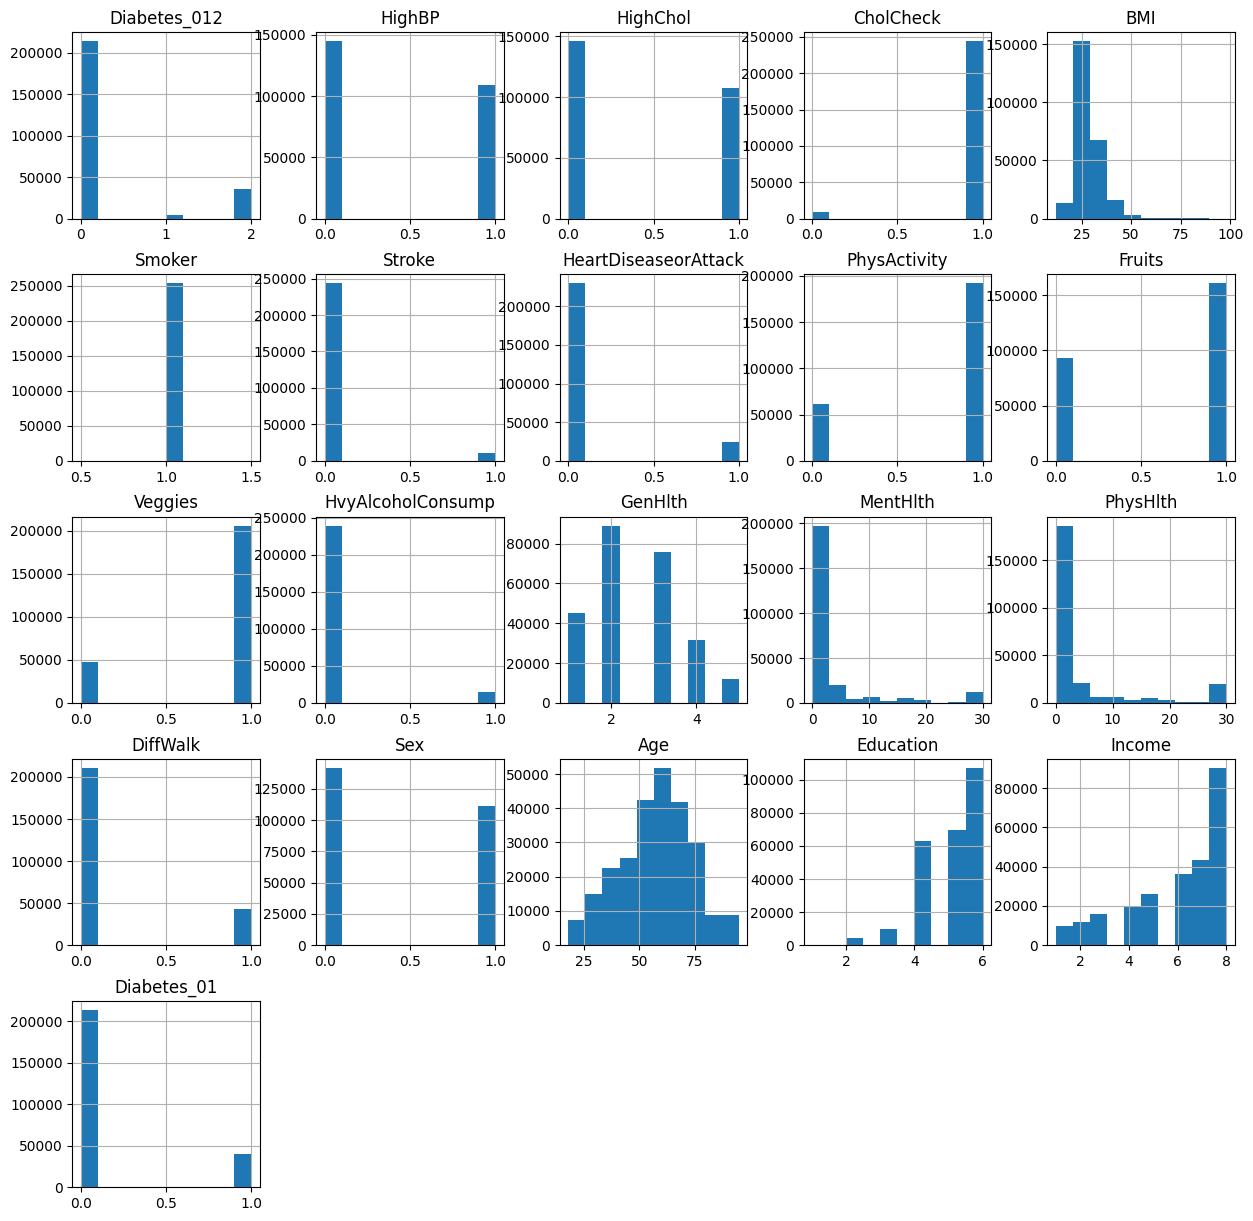

In [ ]:
# Visualize the distribution of numeric features like Age, BMI, etc.
import matplotlib.pyplot as plt

df.hist(figsize=(15, 15))
plt.show()

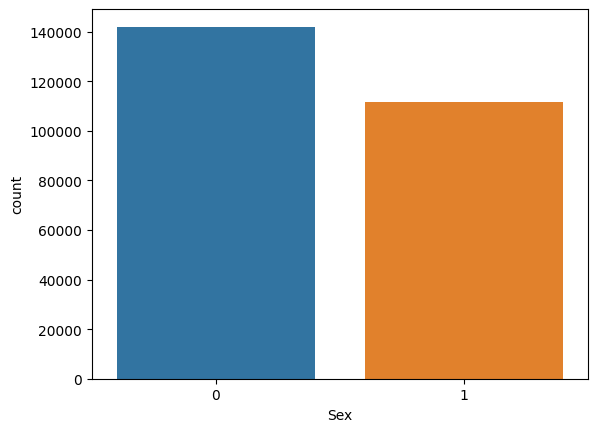

In [ ]:
# Show the distribution of categorical features.
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Sex', data=df)
plt.show()

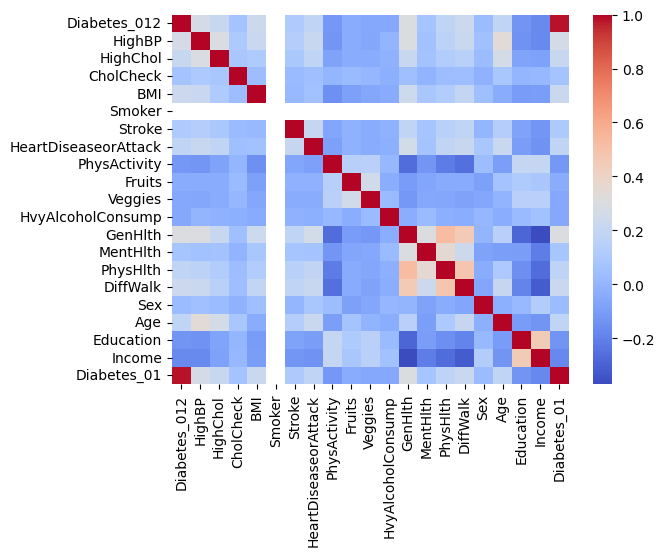

In [ ]:
# Visualize the correlation between different features.
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.show()

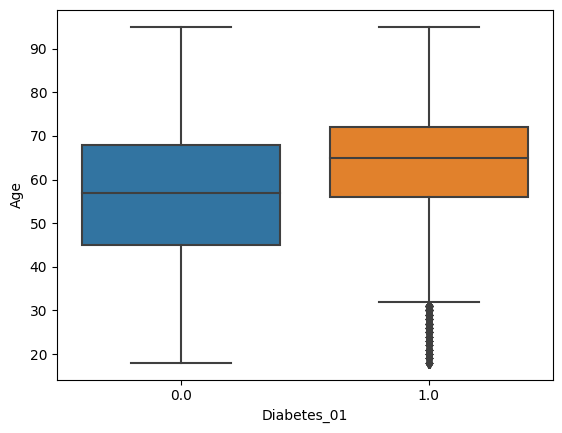

In [ ]:
# Visualize the distribution and identify outliers.
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='Diabetes_01', y='Age', data=df)
plt.show()

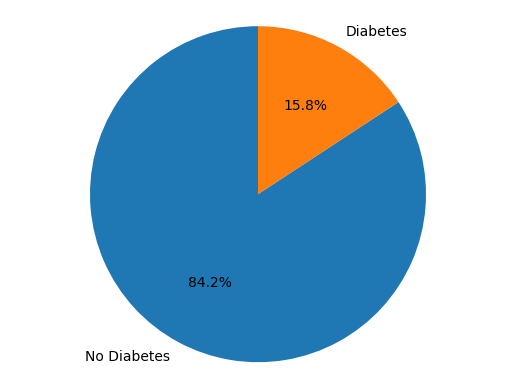

In [ ]:
# Display the distribution of a binary categorical variable.
import matplotlib.pyplot as plt

labels = ['No Diabetes', 'Diabetes']
sizes = df['Diabetes_01'].value_counts()
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.show()

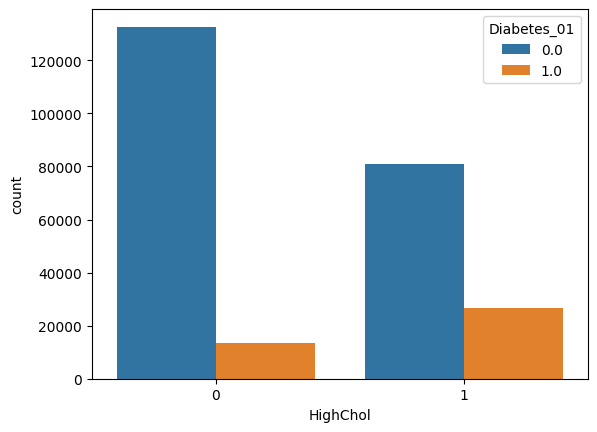

In [ ]:
# Count the occurrences of categorical variables.
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='HighChol', hue='Diabetes_01', data=df)
plt.show()

# **Models**

### **Naive Bayes**

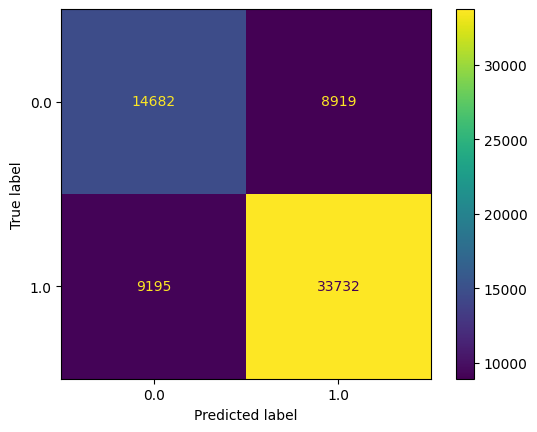

Bernoulli Naive Bayes model accuracy (in %): 72.77236652236653
                    0.0           1.0  accuracy     macro avg  weighted avg
precision      0.614901      0.790884  0.727724      0.702893      0.728454
recall         0.622092      0.785799  0.727724      0.703946      0.727724
f1-score       0.618476      0.788333  0.727724      0.703405      0.728076
support    23601.000000  42927.000000  0.727724  66528.000000  66528.000000


In [ ]:
def naivebayes():
    from sklearn.naive_bayes import BernoulliNB
    from sklearn.metrics import classification_report, confusion_matrix
    from sklearn import metrics
    from sklearn.metrics import ConfusionMatrixDisplay

    # Instantiate the Bernoulli Naive Bayes classifier
    clf = BernoulliNB()

    # Train the classifier on the training data
    clf.fit(x_train_imputed, y_train)

    # Predict the target variable on the test data
    y_pred = clf.predict(x_test_imputed)

    # Display confusion matrix
    confusion_matrix(y_test, y_pred)

    # Compute confusion matrix and display it using ConfusionMatrixDisplay
    cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
    disp.plot()
    plt.show()

    # Display the accuracy of the Naive Bayes model
    print("Bernoulli Naive Bayes model accuracy (in %):", metrics.accuracy_score(y_test, y_pred) * 100)

    # Display classification report
    report = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True))
    print(report)

naivebayes()


### **Decision Tree**

DT model accuracy(in %): 80.17075517075517
accuracy_score = 0.8953812326085195


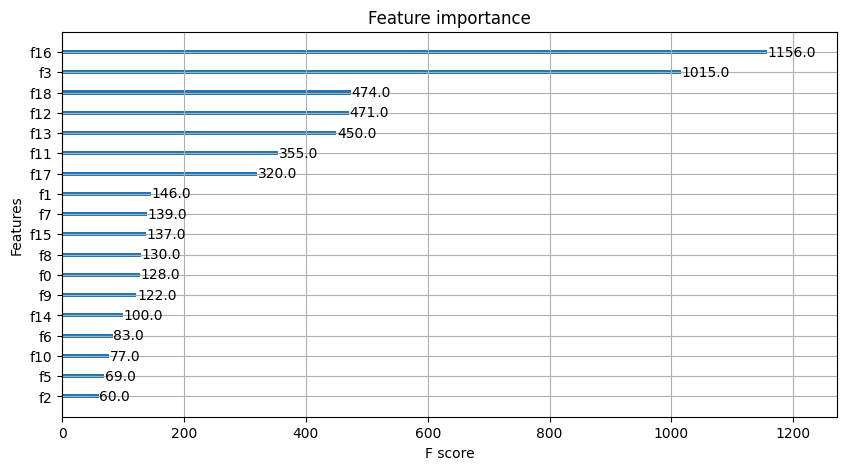

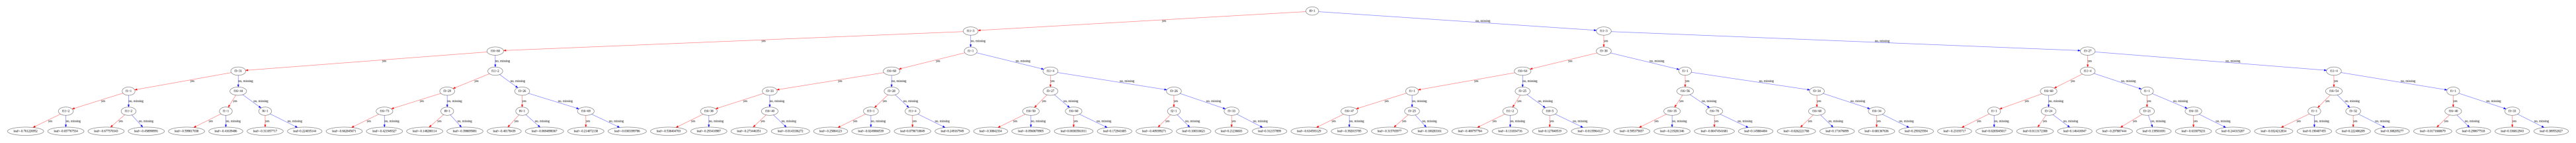

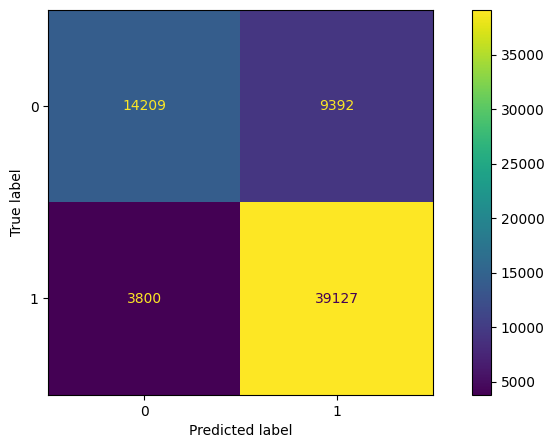

                    0.0           1.0  accuracy     macro avg  weighted avg
precision      0.788994      0.806426  0.801708      0.797710      0.800242
recall         0.602051      0.911478  0.801708      0.756764      0.801708
f1-score       0.682961      0.855740  0.801708      0.769350      0.794446
support    23601.000000  42927.000000  0.801708  66528.000000  66528.000000


In [37]:
def decisiontree():
  from xgboost import XGBClassifier
  from sklearn.model_selection import train_test_split
  from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
  from sklearn.preprocessing import LabelEncoder
  import numpy as np
  import pandas as pd

  model = XGBClassifier()

  # Label encode categorical columns
  le = LabelEncoder()
  categ = ['HighChol','Fruits','Veggies','DiffWalk','Smoker','Sex']
  df[categ] = df[categ].apply(le.fit_transform)

  # Fit the XGBoost model on training data
  model.fit(x_train_imputed, y_train)

  # Predict the targets
  y_pred = model.predict(x_test_imputed)
  rmse = np.sqrt(accuracy_score(y_test, y_pred))

  from sklearn import metrics
  # Display the accuracy of the XGBoost model
  print("DT model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)
  print(f"accuracy_score = {rmse}")

  # Plot feature importance
  import matplotlib.pyplot  as plt
  from xgboost import plot_importance
  plot_importance(model)
  plt.rcParams['figure.figsize'] = [50, 500]
  plt.show()

  # Plot the first tree
  import xgboost as xgb
  xgb.plot_tree(model)
  plt.rcParams['figure.figsize'] = [10, 5]
  plt.show()


  from sklearn.metrics import accuracy_score,confusion_matrix

  # Display confusion matrix
  cm = confusion_matrix(y_test, y_pred, labels= model.classes_)
  disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = model.classes_)
  disp.plot()
  plt.show()

  report = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True))
  print(report)

decisiontree()

### **K-Neighbors Classifier**

Kneighbors Classifier model accuracy(in %): 77.12842712842712


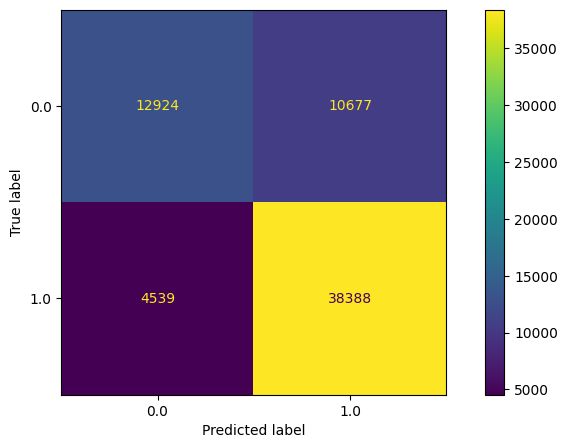

                    0.0           1.0  accuracy     macro avg  weighted avg
precision      0.740079      0.782391  0.771284      0.761235      0.767381
recall         0.547604      0.894262  0.771284      0.720933      0.771284
f1-score       0.629456      0.834594  0.771284      0.732025      0.761821
support    23601.000000  42927.000000  0.771284  66528.000000  66528.000000


<Figure size 1200x600 with 0 Axes>

In [ ]:
def kneighborsClassifier_bin(x_train, x_test, y_train, y_test):
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.preprocessing import StandardScaler
    from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
    from sklearn import metrics
    import matplotlib.pyplot as plt
    import pandas as pd

    # Feature scaling
    sc_x = StandardScaler()
    X_train = sc_x.fit_transform(x_train_imputed)
    X_test = sc_x.transform(x_test_imputed)

    # Define the model: Initialize K-NN
    classifier = KNeighborsClassifier(n_neighbors=450, p=2, metric='euclidean')
    classifier.fit(X_train, y_train)

    # Predict the targets
    y_pred = classifier.predict(X_test)

    print("Kneighbors Classifier model accuracy(in %):", metrics.accuracy_score(y_test, y_pred) * 100)

    # Evaluate model
    cm = confusion_matrix(y_test, y_pred, labels=classifier.classes_)

    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)
    disp.plot()

    plt.show()

    plt.figure(figsize=(12, 6))

    report = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True))
    print(report)

kneighborsClassifier_bin(x_train, x_test, y_train, y_test)

# **Logistic Regression**

Logistic Regression model accuracy (in %): 77.17953342953344


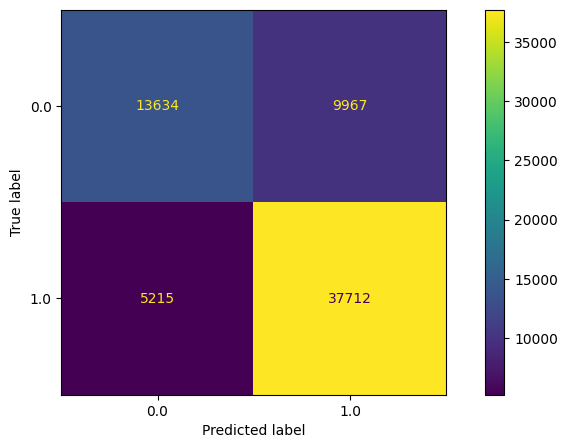

                    0.0           1.0  accuracy     macro avg  weighted avg
precision      0.723327      0.790956  0.771795      0.757142      0.766965
recall         0.577687      0.878515  0.771795      0.728101      0.771795
f1-score       0.642356      0.832439  0.771795      0.737398      0.765007
support    23601.000000  42927.000000  0.771795  66528.000000  66528.000000


In [ ]:
def logisticregression():
    from sklearn.preprocessing import StandardScaler
    from sklearn.metrics import confusion_matrix, classification_report
    from sklearn.linear_model import LogisticRegression

    # Standardize the features using StandardScaler
    scaler = StandardScaler()
    scale = scaler.fit(x_train_imputed)
    x_train = scale.transform(x_train_imputed)
    x_test = scale.transform(x_test_imputed)

    # Instantiate the Logistic Regression classifier
    logreg = LogisticRegression()

    # Train the classifier on the standardized training data
    logreg.fit(x_train, y_train)

    # Predict the target variable on the standardized test data
    y_pred = logreg.predict(x_test)

    from sklearn import metrics
    # Display the accuracy of the Logistic Regression model
    print("Logistic Regression model accuracy (in %):", metrics.accuracy_score(y_test, y_pred) * 100)

    # Display confusion matrix
    confusion_matrix(y_test, y_pred)

    # Compute confusion matrix and display it using ConfusionMatrixDisplay
    cm = confusion_matrix(y_test, y_pred, labels=logreg.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg.classes_)
    disp.plot()
    plt.show()

    # Display classification report
    report = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True))
    print(report)

logisticregression()